In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import timedelta as delta
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats

from matplotlib.lines import Line2D
import matplotlib.cm  as cm
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
from matplotlib.patches import Rectangle

In [2]:
river_sources = np.load('../river_sources.npy', allow_pickle=True).item()

In [3]:
river_sources

{'Congo': (-5.6442, 12.1375),
 'Cape-Town': (-33.93, 18.56),
 'Rio-de-la-Plata': (-33.9375, -58.5208),
 'Porto-Alegre': (-30.051, -51.285),
 'Santos': (-23.9875, -46.2958),
 'Paraiba': (-21.6208, -41.0375),
 'Itajai': (-26.9125, -48.6458),
 'Rio-de-Janeiro': (-23.0125, -43.32083),
 'Salvador': (-13.017065, -38.579832),
 'Recife': (-8.09, -34.88)}

In [4]:
ordered_labels = ['Recife',
                  'Salvador',
                  'Paraiba',
                  'Rio-de-Janeiro',
                  'Santos',
                  'Itajai',
                  'Porto-Alegre',
                  'Rio-de-la-Plata',
                  'Unclustered-America',
                  'Cape-Town',
                  'Congo',
                  'Unclustered-Africa']

In [5]:
clusters = ordered_labels[:-1]
clusters.pop(8)

'Unclustered-America'

In [6]:
clusters

['Recife',
 'Salvador',
 'Paraiba',
 'Rio-de-Janeiro',
 'Santos',
 'Itajai',
 'Porto-Alegre',
 'Rio-de-la-Plata',
 'Cape-Town',
 'Congo']

# Averaged Plots

In [7]:
posterior = xr.load_dataset('../analysis/sa-s08/posterior_average_1234.nc')
likelihood = xr.load_dataset('../analysis/sa-s08/likelihood_average_1234.nc')

In [8]:
# posterior = xr.load_dataset('../data/analysis/sa-s06/posterior_sa-s06_aw1234.nc')
# likelihood = xr.load_dataset('../data/analysis/sa-s06/likelihood_sa-S06_aw1234.nc')

In [9]:
etiquetas = list(posterior.keys())
etiquetas.pop(-1)
# labels.pop(0)

'counts'

In [10]:
y,x = np.meshgrid(posterior['lat'], posterior['lon'])

# Probability maps

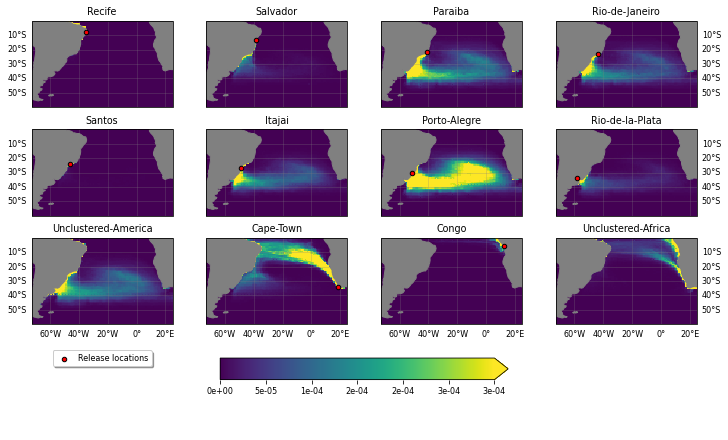

In [45]:
# likelihood
t = 0
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10, 6),
                       subplot_kw={'projection': ccrs.PlateCarree()},
                       sharey=True, constrained_layout=True)
ax = ax.reshape(16)

for k, loc in enumerate(ordered_labels):
    z = likelihood[loc][t]
    ax[k].set_extent([-73.0, 25, -60, 0], crs=ccrs.PlateCarree())
    # ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=2, facecolor='#808080')
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x, y, z, cmap='viridis', vmax=0.0003)
    
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                         linewidth=0.5, color='gray', alpha=0.5)

    if k in [1, 2, 3, 5, 6, 7, 9, 10, 11]:
        gl.left_labels = False

    if k in [0, 1, 2, 3, 4, 5, 6, 7]:
        gl.bottom_labels = False

    gl.top_labels = False
    gl.right_labels = False
    
    if k in [3, 7, 11]:
        gl.right_labels = True
        
    if loc not in ['Unclustered-Africa', 'Unclustered-America']:
        h = ax[k].scatter(river_sources[loc][1], river_sources[loc][0],
                          s=20, marker='o', color='red', edgecolors='k',
                          zorder=3, label='Release locations')

for k in range(12, 16):
    ax[k].axis('off')

ax[12].legend(handles=[h], loc='upper center', shadow=True)
bar_ax = fig.add_axes([0.3, 0.13, 0.4, 0.05])
cbar = fig.colorbar(im, cax=bar_ax, orientation='horizontal', extend='max')
cbar.ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

plt.savefig('../article_figs/sa-s08/likelihood_lambda171.pdf', format='pdf')
# plt.close()

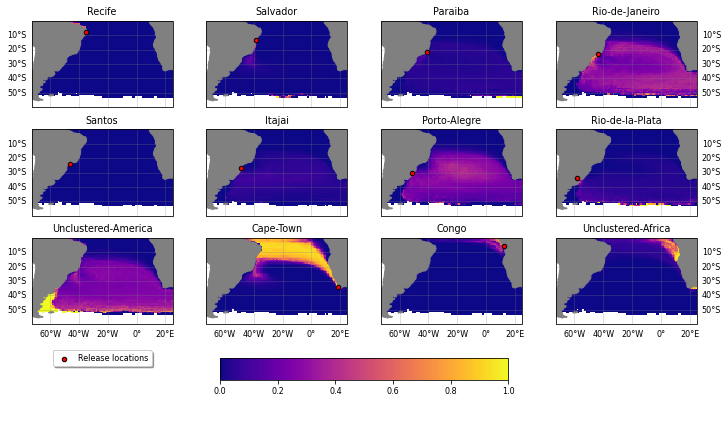

In [46]:
# posterior
t = 0
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10, 6),
                       subplot_kw={'projection': ccrs.PlateCarree()},
                       sharey=True, constrained_layout=True)
ax = ax.reshape(16)

for k, loc in enumerate(ordered_labels):
    z = posterior[loc][t]
    ax[k].set_extent([-73.0, 25, -60, 0], crs=ccrs.PlateCarree())
    # ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=2, facecolor='#808080')
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x, y, z, cmap='plasma', vmax=1)
    
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                         linewidth=0.5, color='gray', alpha=0.5)

    if k in [1, 2, 3, 5, 6, 7, 9, 10, 11]:
        gl.left_labels = False

    if k in [0, 1, 2, 3, 4, 5, 6, 7]:
        gl.bottom_labels = False

    gl.top_labels = False
    gl.right_labels = False
    
    if k in [3, 7, 11]:
        gl.right_labels = True
        
    if loc not in ['Unclustered-Africa', 'Unclustered-America']:
        h = ax[k].scatter(river_sources[loc][1], river_sources[loc][0],
                          s=20, marker='o', color='red', edgecolors='k',
                          zorder=3, label='Release locations')

for k in range(12, 16):
    ax[k].axis('off')

ax[12].legend(handles=[h], loc='upper center', shadow=True)
bar_ax = fig.add_axes([0.3, 0.13, 0.4, 0.05])
cbar = fig.colorbar(im, cax=bar_ax, orientation='horizontal')

plt.savefig('../article_figs/sa-s08/posterior_lambda171.pdf', format='pdf')
# plt.close()

In [13]:
t =0
total = 0
for k, loc in enumerate(ordered_labels):
    
    total += posterior[loc][t]
    
np.nanmean(total.data)

1.0

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


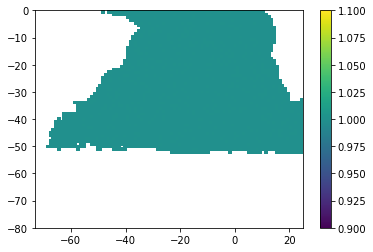

In [14]:
plt.pcolormesh(x,y, total)
plt.colorbar()

# Standard deviation Main simualtion

In [11]:
std_1234 = xr.load_dataset('../analysis/STD__aw1234_6_100.nc')

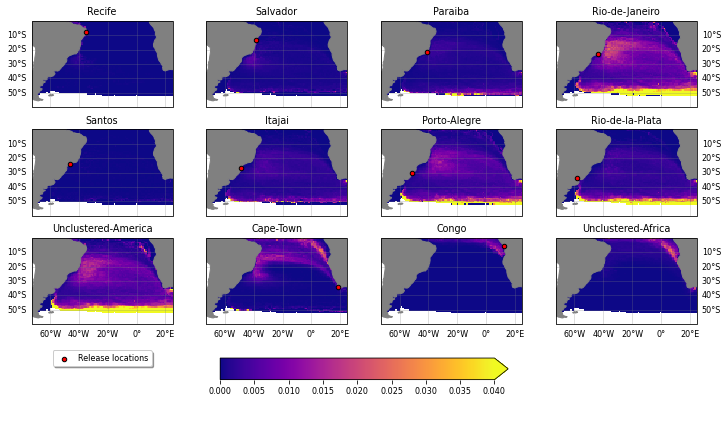

In [24]:
# posterior
t = 0
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10, 6),
                       subplot_kw={'projection': ccrs.PlateCarree()},
                       sharey=True, constrained_layout=True)
ax = ax.reshape(16)

for k, loc in enumerate(ordered_labels):
    z = std_1234[loc][t]
    ax[k].set_extent([-73.0, 25, -60, 0], crs=ccrs.PlateCarree())
    # ax[k].add_feature(cfeature.OCEAN)
    ax[k].add_feature(cfeature.LAND, zorder=2, facecolor='#808080')
    ax[k].add_feature(cfeature.RIVERS)
    ax[k].set_title(loc)
    im = ax[k].pcolormesh(x, y, z, cmap='plasma', vmax=0.04)
    
    gl = ax[k].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                         linewidth=0.5, color='gray', alpha=0.5)

    if k in [1, 2, 3, 5, 6, 7, 9, 10, 11]:
        gl.left_labels = False

    if k in [0, 1, 2, 3, 4, 5, 6, 7]:
        gl.bottom_labels = False

    gl.top_labels = False
    gl.right_labels = False
    
    if k in [3, 7, 11]:
        gl.right_labels = True
        
    if loc not in ['Unclustered-Africa', 'Unclustered-America']:
        h = ax[k].scatter(river_sources[loc][1], river_sources[loc][0],
                          s=20, marker='o', color='red', edgecolors='k',
                          zorder=3, label='Release locations')

for k in range(12, 16):
    ax[k].axis('off')

ax[12].legend(handles=[h], loc='upper center', shadow=True)
bar_ax = fig.add_axes([0.3, 0.13, 0.4, 0.05])
cbar = fig.colorbar(im, cax=bar_ax, orientation='horizontal', extend='max')
# cbar.ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

plt.savefig('../article_figs/sa-s08/std_lambda69.pdf', format='pdf')
# plt.close()

# Time series
## particle age

In [16]:
posterior30 = xr.load_dataset('../analysis/sa-s08/posterior_average_30.nc')
likelihood30 = xr.load_dataset('../analysis/sa-s08/likelihood_average_30.nc')
std_30 = xr.load_dataset('../analysis/sa-s08/STD__aw30_sa-8_100.nc')

- Age Distributions plots
################################
Point A coords: -32.405063291139236 lat, -37.639175257731964 lon
Point B coords: -32.405063291139236 lat, 5.804123711340196 lon
Point C coords: -19.24050632911392 lat, -13.391752577319593 lon
################################


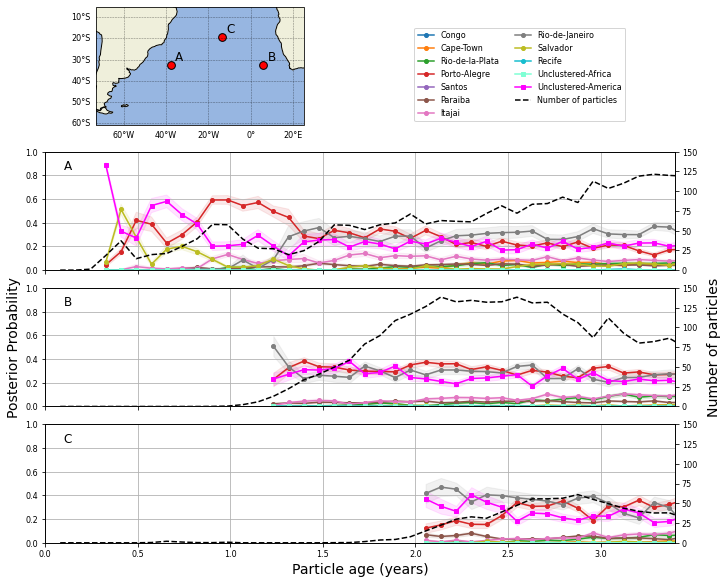

In [20]:
min_particle_cond = 10

print('- Age Distributions plots')
plt.rcParams['font.size'] = 8

A = (35, 47)
B = (78, 47)
C = (59, 60)
time = np.linspace(1, 53, 53)*30/365

fig = plt.figure(figsize=(10, 8), constrained_layout=True)
gs = fig.add_gridspec(4, 2, wspace=0.05, height_ratios=[0.25]+[0.75/3]*3)

##
ax00 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
gl = ax00.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=0.5, color='black', alpha=0.5,
                    linestyle='--')
gl.top_labels = False
gl.right_labels = False

ax00.set_extent([-73.0, 24.916666, -60.916664, -5.0833335],
                crs=ccrs.PlateCarree())

ax00.add_feature(cfeature.OCEAN)
ax00.add_feature(cfeature.LAND, zorder=1)
ax00.add_feature(cfeature.COASTLINE)

ilons = [A[0], B[0], C[0]]
ilats = [A[1], B[1], C[1]]
labels = ['A', 'B', 'C']

print('################################')
for i in range(3):
    lon_coord = posterior30['lon'][ilons[i]].values
    lat_coord = posterior30['lat'][ilats[i]].values
    ax00.scatter(lon_coord, lat_coord,
                 s=60, marker='o', color='red', edgecolors='k')
    ax00.text(posterior30['lon'][ilons[i]]+2, posterior30['lat']
              [ilats[i]]+2, labels[i], fontsize=12)

    print(f'Point {labels[i]} coords: {lat_coord} lat, {lon_coord} lon')
print('################################')

ax01 = fig.add_subplot(gs[0, 1])
ax01.axis('off')
ax11 = fig.add_subplot(gs[1, :])
ax21 = fig.add_subplot(gs[2, :], sharex=ax11)
ax31 = fig.add_subplot(gs[3, :], sharex=ax11)
plt.setp(ax11.get_xticklabels(), visible=False)
plt.setp(ax21.get_xticklabels(), visible=False)
handles = []

for k, loc in enumerate(etiquetas):
    if loc in clusters:
        marker_color = f'C{k}'
        fmt_ = 'o-'
    elif loc == 'Unclustered-America':
        marker_color = 'magenta'
        fmt_ = 's-'
    elif loc == 'Unclustered-Africa':
        marker_color = 'aquamarine'
        fmt_ = 's-'
        
    a = posterior30[loc][:, A[0], A[1]].where(
        posterior30['counts'][:, A[0], A[1]] >= min_particle_cond)
    ebar_a = std_30[loc][:, A[0], A[1]].where(posterior30['counts'][:, A[0],A[1]]>min_particle_cond)

    b = posterior30[loc][:, B[0], B[1]].where(
        posterior30['counts'][:, B[0], B[1]] >= min_particle_cond)
    ebar_b = std_30[loc][:, B[0], B[1]].where(posterior30['counts'][:, B[0],B[1]]>min_particle_cond)
    c = posterior30[loc][:, C[0], C[1]].where(
        posterior30['counts'][:, C[0], C[1]] >= min_particle_cond)
    ebar_c = std_30[loc][:, C[0], C[1]].where(posterior30['counts'][:, C[0],C[1]]>min_particle_cond)
    
    alfa = 0.1
    
    hdl = ax11.plot(time, a, fmt_, label=loc, color=marker_color, ms=4)
    ax11.fill_between(time, a, a + ebar_a, color=marker_color, alpha=alfa)
    ax11.fill_between(time, a, a - ebar_a, color=marker_color, alpha=alfa)

    ax21.plot(time, b, fmt_, label=loc, color=marker_color, ms=4)
    ax21.fill_between(time, b, b + ebar_b, color=marker_color, alpha=alfa)
    ax21.fill_between(time, b, b - ebar_b, color=marker_color, alpha=alfa)
    
    ax31.plot(time, c, fmt_, label=loc, color=marker_color, ms=4)
    ax31.fill_between(time, c, c + ebar_c, color=marker_color, alpha=alfa)
    ax31.fill_between(time, c, c - ebar_c, color=marker_color, alpha=alfa)

    handles.append(hdl[0])
    
     
ax11_t = ax11.twinx()
ax21_t = ax21.twinx()
ax31_t = ax31.twinx()

hdl_twin = ax11_t.plot(time, posterior30['counts'][:, A[0], A[1]],
                       '--', label='Number of particles', c='k')
handles = handles + hdl_twin
ax21_t.plot(time, posterior30['counts'][:,  B[0], B[1]], '--',
            label=loc, c='k')
ax31_t.plot(time, posterior30['counts'][:,  C[0], C[1]], '--',
            label=loc, c='k')
up_lim = 150
ax11_t.set_ylim(0, up_lim)
ax21_t.set_ylim(0, up_lim)
ax31_t.set_ylim(0, up_lim)
ax11_t.set_xlim(0, 3.4)
ax21_t.set_xlim(0, 3.4)
ax31_t.set_xlim(0, 3.4)
ax21_t.set_ylabel('Number of particles', fontsize=14, labelpad=10)
ax21.set_ylabel('Posterior Probability', fontsize=14)
ax11.grid()
ax21.grid()
ax31.grid()
ax11.set_ylim(0, 1)
ax21.set_ylim(0, 1)
ax31.set_ylim(0, 1)
ax11.text(0.1, 0.85, 'A', fontsize=12)
ax21.text(0.1, 0.85, 'B', fontsize=12)
ax31.text(0.1, 0.85, 'C', fontsize=12)
ax31.set_xlabel('Particle age (years)', fontsize=14)

ax01.legend(handles=handles, loc='lower center', ncol=2)
plt.savefig('../article_figs/sa-s08/age_distributions_lambda171.pdf', format='pdf')
# plt.close()


In [32]:
handles[-1]

In [31]:
handles[0]

# Beaching probability

Detect new coastal cells after computing the histogram?

In [37]:
america = xr.load_dataset('../analysis/sa-s08/beach_posterior_America_average_1234.nc')
africa = xr.load_dataset('../analysis/sa-s08/beach_posterior_Africa_average_1234.nc')

In [38]:
african_sources = ['Congo', 'Cape-Town']
american_sources = ['Paraiba', 'Itajai', 'Rio-de-la-Plata', 'Rio-de-Janeiro', 'Porto-Alegre', 'Santos',
                   'Recife', 'Salvador']

In [39]:
ordered_labels_2 = ['Recife',
                 'Santos',  
                 'Unclustered-America',
                   'Salvador',
                    'Itajai',
                    'Cape-Town',
                    'Paraiba',
                    'Porto-Alegre',
                    'Congo',
                    'Rio-de-Janeiro',
                    'Rio-de-la-Plata',
                    'Unclustered-Africa']
                   
                   

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator


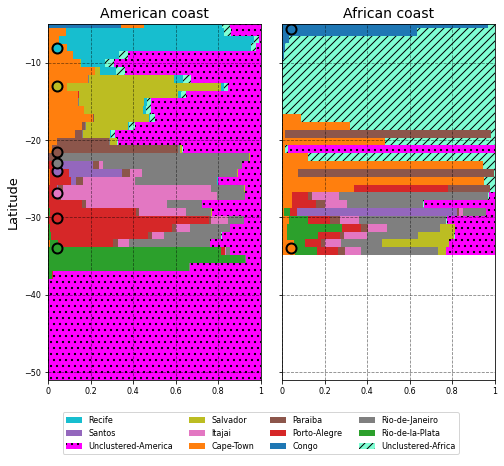

In [48]:
# x_colors = np.linspace(0,1, 9)
# colors = cm.get_cmap('tab10')(x_colors)

fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, 2, wspace=0.1, height_ratios=[0.9, 0.1])
ax = gs.subplots(sharey=True)

lower_margin_am = 0
lower_margin_af = 0

handles = []

for k, loc in enumerate(etiquetas):
    
    if loc in clusters:
        ax[0,0].barh(america['lat'], america[loc][0], label=loc, height=1.02,
               left=lower_margin_am, color=f'C{k}',align='center')
        lower_margin_am += np.nan_to_num(america[loc][0])

        hdl = ax[0,1].barh(africa['lat'], africa[loc][0], height=1.02,
               left=lower_margin_af, color=f'C{k}', align='center')
        lower_margin_af += np.nan_to_num(africa[loc][0])
        
        handles.append(hdl[0])
        
    elif loc=='Unclustered-Africa':
        ax[0,0].barh(america['lat'], america[loc][0], label=loc, height=1.02,
               left=lower_margin_am, color='aquamarine',align='center', hatch='///')
        lower_margin_am += np.nan_to_num(america[loc][0])

        hdl = ax[0,1].barh(africa['lat'], africa[loc][0], height=1.02,
               left=lower_margin_af, color='aquamarine', align='center', hatch='///')
        lower_margin_af += np.nan_to_num(africa[loc][0])
        
        handles.append(hdl[0])
        
    elif loc=='Unclustered-America':
        ax[0,0].barh(america['lat'], america[loc][0], label=loc, height=1.02,
               left=lower_margin_am, color='magenta',align='center', hatch='..')
        lower_margin_am += np.nan_to_num(america[loc][0])

        hdl = ax[0,1].barh(africa['lat'], africa[loc][0], height=1.02,
               left=lower_margin_af, color='magenta', align='center', hatch='..')
        lower_margin_af += np.nan_to_num(africa[loc][0])
        
        handles.append(hdl[0])
        
    
    if loc in african_sources:
        ax[0,1].scatter(0.04, river_sources[loc][0], color=f'C{k}', edgecolor='k', zorder=3, s=100,
                     linewidths=2)
        
    elif loc in american_sources:
        ax[0,0].scatter(0.04, river_sources[loc][0], color=f'C{k}', edgecolor='k', zorder=3, s=100,
                     linewidths=2)
        
my_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
ax[0,0].set_xticklabels(my_ticks)
ax[0,1].set_xticklabels(my_ticks)
ax[0,0].set_ylim(-51, -5)
ax[0,0].set_xlim(0, 1)

ax[0,0].set_title('American coast', fontsize=14)

ax[0,1].set_title('African coast', fontsize=14)
ax[0,1].set_xlim(0, 1)

ax[0,0].set_ylabel('Latitude', fontsize=13)
# ax[0,0].set_xlabel('Probability', fontsize=13)
# ax[0,1].set_xlabel('Probability', fontsize=13)
ax[0,0].grid(color='k', linestyle='--', alpha=0.5)
ax[0,1].grid(color='k', linestyle='--', alpha=0.5)

ax[1,0].axis('off')
ax[1,1].axis('off')

handles, leg_labels = ax[0,0].get_legend_handles_labels()
new_handles = []

for m in ordered_labels_2:
    for n, loc in enumerate(leg_labels):
        if loc == m:
            new_handles.append(handles[n])

# new_handles = list((new_handles, ordered_labels_2))
ax[0,0].legend(new_handles, ordered_labels_2, bbox_to_anchor=(1, -0.15), loc='center', ncol=4)
# ax[0,0].legend(bbox_to_anchor=(1, -0.15), loc='center', ncol=4)

plt.savefig('../article_figs/sa-s08/beached_probability_lambda171.pdf', format='pdf')